In [1]:
# import seaborn as snsf
from __future__ import print_function, division
from scipy.stats import circmean, circstd
from fakespikes.util import create_psd
from pykdf.kdf import load_kdf

%matplotlib inline
from brian2 import *

# EI populations

## Increasing drive in a single population.

In [ ]:
%run ../ie.py ie -p 1 -q 1 

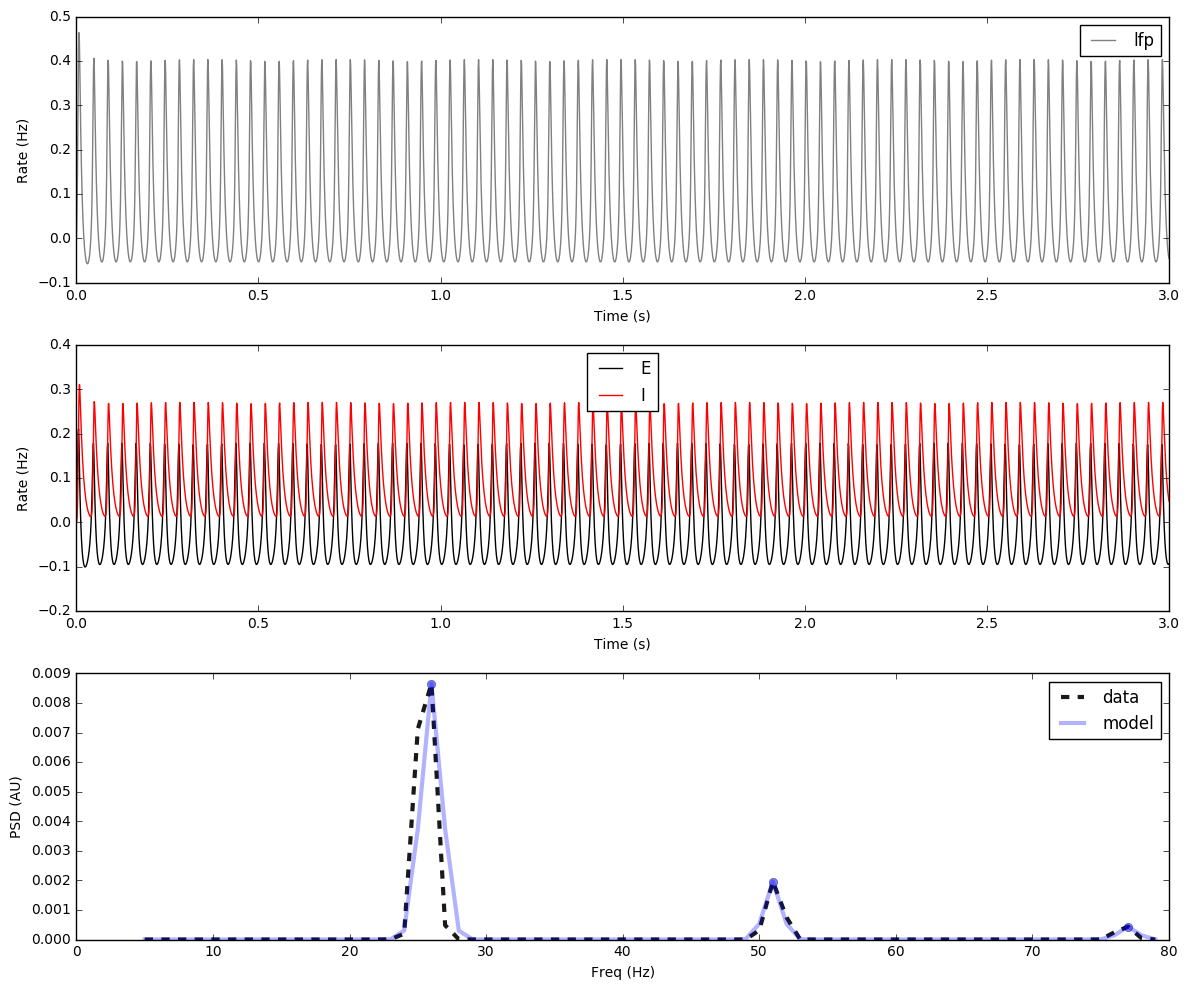

In [24]:
res = load_kdf('ie.hdf5')

# -
t = res['t']
dt = res['dt']
times = np.linspace(0, t, t * int(1 / float(dt)))

# -
E = res['E']
I = res['I']
lfp = res['lfp']

# -
figure(figsize=(12, 10))

subplot(311)
plot(times, lfp, label='lfp', color='grey')
legend(loc='best')
xlabel("Time (s)")
ylabel("Rate (Hz)")
xlim(0, 3)

subplot(312)
plot(times, E, label='E', color='k')
plot(times, I, label='I', color='r')
legend(loc='best')
xlabel("Time (s)")
ylabel("Rate (Hz)")
xlim(0, 3)

# - 
# Make and fit PSD
fs, psd = create_psd(lfp, int(1/dt), outrate=int(1/dt))
m = np.logical_and(fs > 4, fs < 80)
fs = fs[m]
psd = psd[m]
center, powers, stdevs, fit = fit_gaussian(fs, psd)

# -
subplot(313)
plot(fs, psd, color='k', alpha=0.9, ls='--', label='data', lw=3)
plt.plot(center, powers, 'o', alpha=0.5)
plt.plot(fs, fit, color='blue', alpha=0.3, lw=3, label='model')
plt.xlabel("Freq (Hz)")
plt.ylabel("PSD (AU)")
plt.legend()
plt.tight_layout()

## Many populations with random drives (frequencies).

In [9]:
%run ../mixie.py mixie -n 10 -p 2 -q 1 -s 0.5 --dt 1e-4 --seed 12

12


INFO       No numerical integration method specified for group 'neurongroup', using method 'euler' (took 0.04s, trying other methods took 0.06s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup', using method 'euler' (took 0.01s, trying other methods took 0.01s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup', using method 'euler' (took 0.01s, trying other methods took 0.01s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup', using method 'euler' (took 0.01s, trying other methods took 0.01s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup', using method 'euler' (took 0.01s, trying other methods took 0.01s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for gro

WARNING    /home/ejp/anaconda/lib/python2.7/site-packages/scipy/optimize/minpack.py:690: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
 [py.warnings]


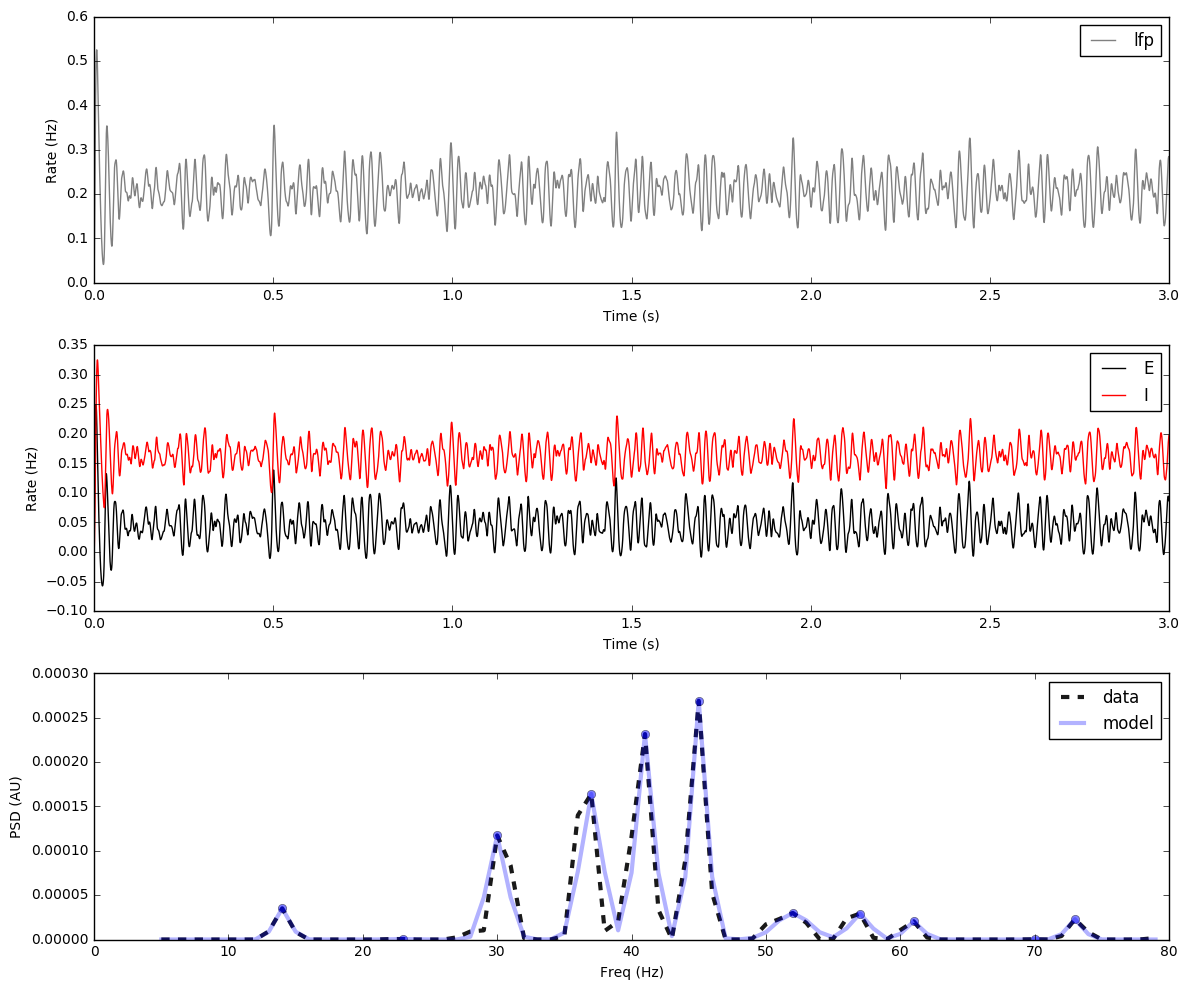

In [10]:
res = load_kdf('mixie.hdf5')

# -
t = res['t']
dt = res['dt']
times = np.linspace(0, t, t * int(1 / float(dt)))

# -
E = res['E']
I = res['I']
lfp = res['lfp']

# - 
figure(figsize=(12, 10))

subplot(311)
plot(times, lfp, label='lfp', color='grey')
legend(loc='best')
xlabel("Time (s)")
ylabel("Rate (Hz)")
xlim(0, 3)

subplot(312)
plot(times, E, label='E', color='k')
plot(times, I, label='I', color='r')
legend(loc='best')
xlabel("Time (s)")
ylabel("Rate (Hz)")
xlim(0, 3)

# - 
# Make and fit PSD
fs, psd = create_psd(lfp, int(1/dt), outrate=int(1/dt))
m = np.logical_and(fs > 4, fs < 80)
fs = fs[m]
psd = psd[m]
center, powers, stdevs, fit = fit_gaussian(fs, psd)

# -
subplot(313)
plot(fs, psd, color='k', alpha=0.9, ls='--', label='data', lw=3)
plt.plot(center, powers, 'o', alpha=0.5)
plt.plot(fs, fit, color='blue', alpha=0.3, lw=3, label='model')
plt.xlabel("Freq (Hz)")
plt.ylabel("PSD (AU)")
plt.legend()
plt.tight_layout()

## Bursting

INFO       No numerical integration method specified for group 'neurongroup', using method 'euler' (took 0.02s, trying other methods took 0.01s). [brian2.stateupdaters.base.method_choice]


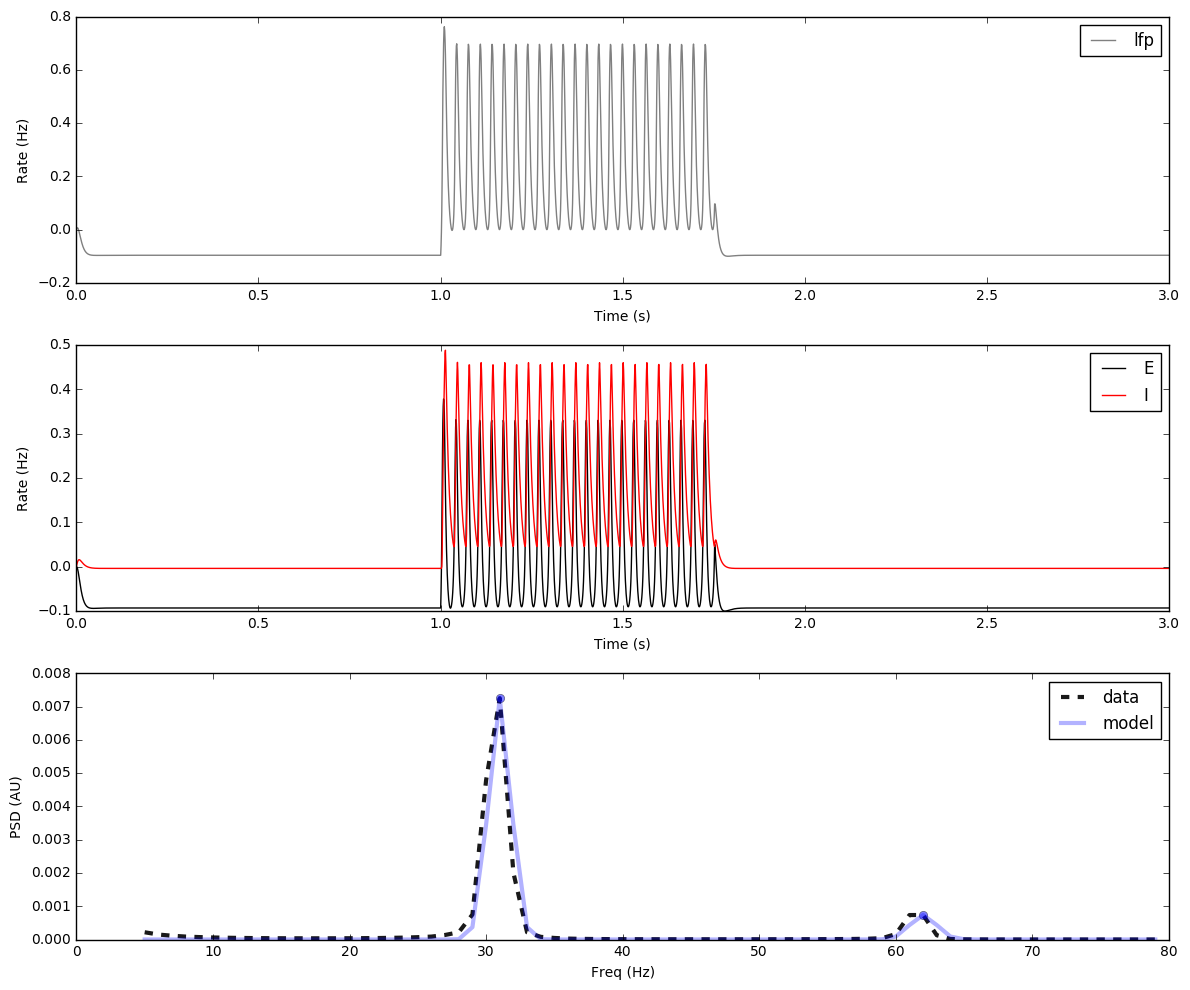

In [12]:
%run ../burstie.py burstie -w 0.5 -s 1
res = load_kdf('burstie.hdf5')

# -
t = res['t']
dt = res['dt']
times = np.linspace(0, t, t * int(1 / float(dt)))

# -
E = res['E']
I = res['I']
lfp = res['lfp']

# -
figure(figsize=(12, 10))

subplot(311)
plot(times, lfp, label='lfp', color='grey')
legend(loc='best')
xlabel("Time (s)")
ylabel("Rate (Hz)")
xlim(0, 3)

subplot(312)
plot(times, E, label='E', color='k')
plot(times, I, label='I', color='r')
legend(loc='best')
xlabel("Time (s)")
ylabel("Rate (Hz)")
xlim(0, 3)

# - 
# Make and fit PSD
fs, psd = create_psd(lfp, int(1/dt), outrate=int(1/dt))
m = np.logical_and(fs > 4, fs < 80)
fs = fs[m]
psd = psd[m]
center, powers, stdevs, fit = fit_gaussian(fs, psd)

# -
subplot(313)
plot(fs, psd, color='k', alpha=0.9, ls='--', label='data', lw=3)
plt.plot(center, powers, 'o', alpha=0.5)
plt.plot(fs, fit, color='blue', alpha=0.3, lw=3, label='model')
plt.xlabel("Freq (Hz)")
plt.ylabel("PSD (AU)")
plt.legend()
plt.tight_layout()

## Drifting

INFO       No numerical integration method specified for group 'neurongroup', using method 'euler' (took 0.02s, trying other methods took 0.01s). [brian2.stateupdaters.base.method_choice]


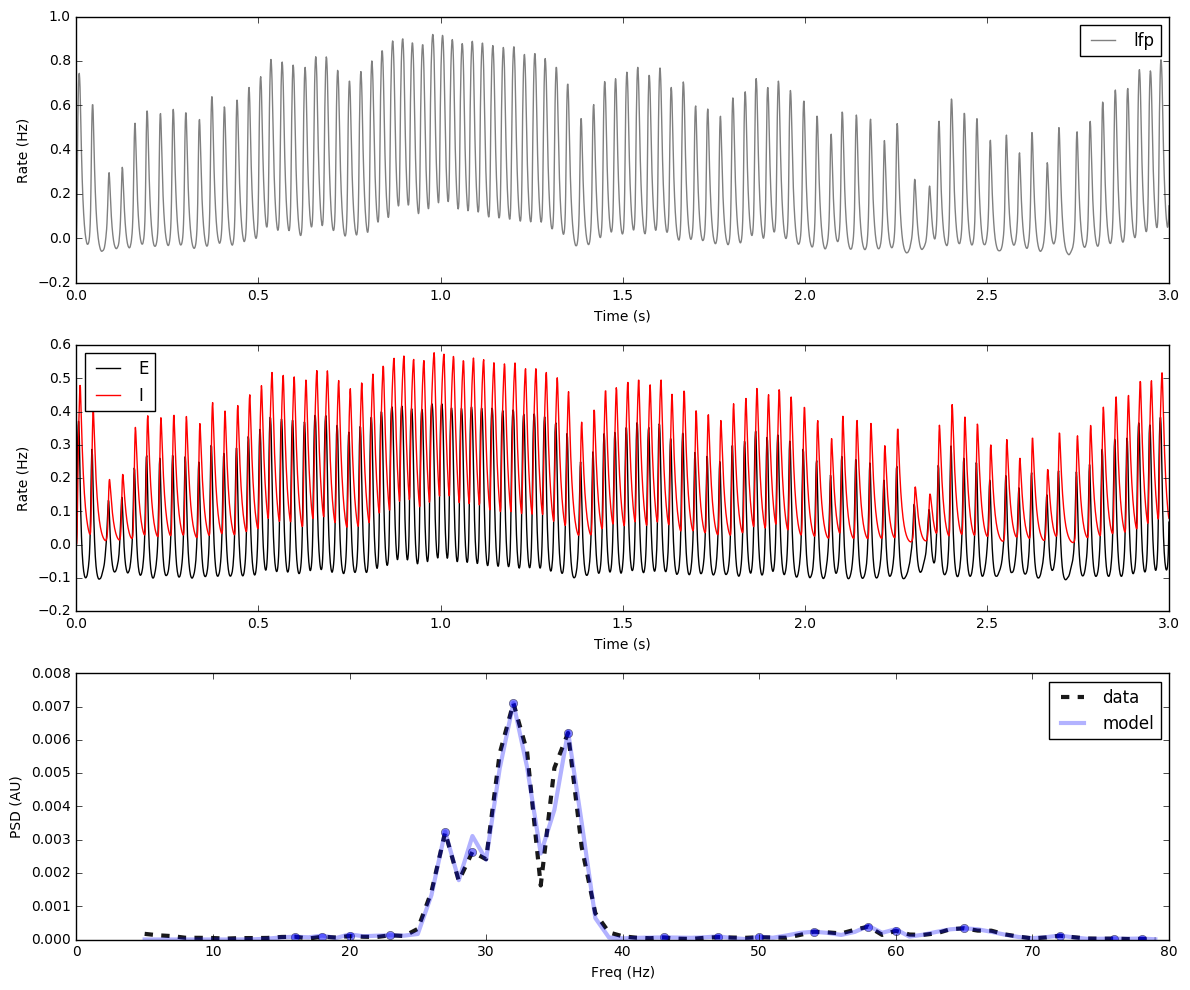

In [13]:
%run ../driftie.py driftie -d .05 --min_P 0.5 
res = load_kdf('driftie.hdf5')

# -
t = res['t']
dt = res['dt']
times = np.linspace(0, t, t * int(1 / float(dt)))

# -
E = res['E']
I = res['I']
lfp = res['lfp']

# -
figure(figsize=(12, 10))

subplot(311)
plot(times, lfp, label='lfp', color='grey')
legend(loc='best')
xlabel("Time (s)")
ylabel("Rate (Hz)")
xlim(0, 3)

subplot(312)
plot(times, E, label='E', color='k')
plot(times, I, label='I', color='r')
legend(loc='best')
xlabel("Time (s)")
ylabel("Rate (Hz)")
xlim(0, 3)

# - 
# Make and fit PSD
fs, psd = create_psd(lfp, int(1/dt), outrate=int(1/dt))
m = np.logical_and(fs > 4, fs < 80)
fs = fs[m]
psd = psd[m]
center, powers, stdevs, fit = fit_gaussian(fs, psd)

# -
subplot(313)
plot(fs, psd, color='k', alpha=0.9, ls='--', label='data', lw=3)
plt.plot(center, powers, 'o', alpha=0.5)
plt.plot(fs, fit, color='blue', alpha=0.3, lw=3, label='model')
plt.xlabel("Freq (Hz)")
plt.ylabel("PSD (AU)")
plt.legend()
plt.tight_layout()

# Coupled oscillators

In [ ]:
%run ../kur.py kur -t 10 -n 2 -k 6 -o 10 -r 2 --seed 34

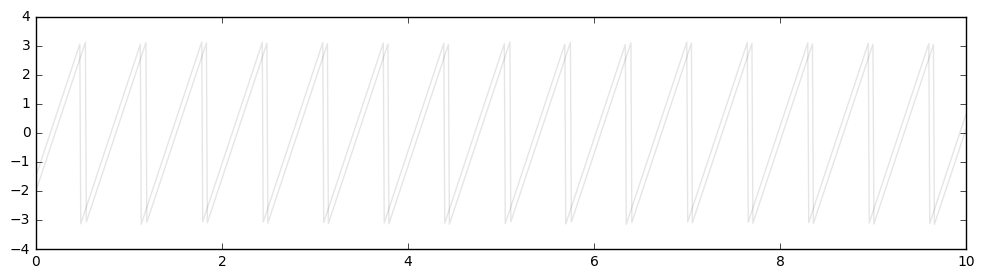

In [16]:
res = load_kdf('kur.hdf5')
times = res['times']

thetas = res['thetas']
lfp = res['lfp']
waves = res['waves']

figure(figsize=(12, 3))
plot(times, thetas, color='k', alpha=0.1);

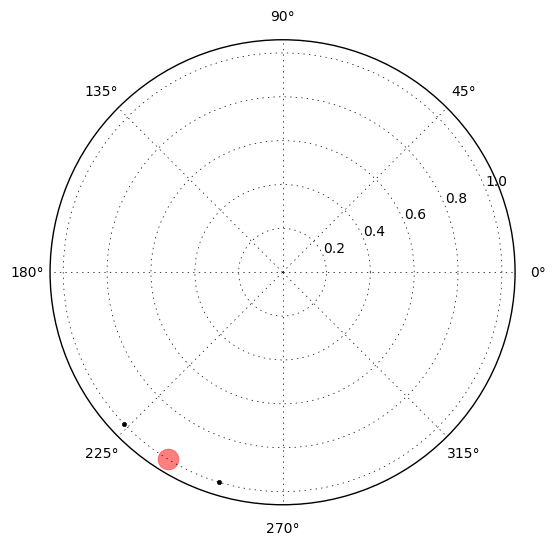

In [17]:
mTheta = circmean(thetas[times > 1, :], axis=0)
r = np.ones_like(mTheta)  # Unit vectors

figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)
ax.plot(mTheta, r, '.k')
ax.plot(circmean(mTheta), 1, '.r', markersize=30, alpha=0.5)

In [18]:
# Now sample the avg theta and simulate sin waves with that property, 
# each at freq range defined in the K model
# Use this to create a LFP, and PSD

The oscillator frequencies are [  8.15424672  11.12040184]


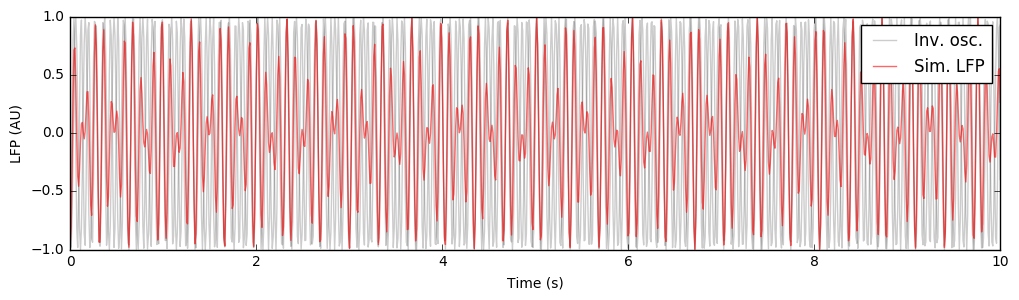

In [19]:
figure(figsize=(12, 3))
for n in range(res['N']):
    wave = waves[n, :]
    if n == 0:
        plt.plot(times, wave, color='k', alpha=0.2, label='Inv. osc.')
    else:
        plt.plot(times, wave, color='k', alpha=0.2)

plt.plot(times, lfp, 'r', alpha=0.6, label='Sim. LFP')
plt.xlabel("Time (s)")
plt.ylabel("LFP (AU)")
plt.legend()

print("The oscillator frequencies are", res['omegas'])

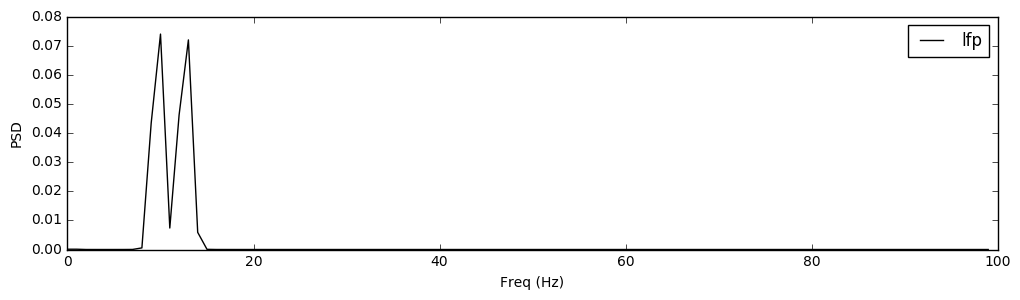

In [23]:
figure(figsize=(12, 3))
fs, psd = create_psd(lfp, int(1/res['dt']))
plot(fs[:100], psd[:100], label='lfp', color='k')
legend(loc='best')
xlabel("Freq (Hz)")
ylabel("PSD")